<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/InteractingSpecies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interacting Species
## Juan C. Reyes - Dalhousie University 
###Nov.29, 2019.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1nawCKKOZtN-EIGOgedWVfwIMJ0rB9Jew' alt = "HareLynx" width="300" height="300" />
<figcaption>Relationships in Nature</figcaption>
</center>
</figure>

Our aim is to apply the theory of planar ordinary differential equations to the study of interacting species. We will restrict our models such that only the interaction between the two species is considered. Any external factors such as pollution, environment, refuge, age classes, and other species interactions are ignored. 

We will learn that even these simplified models yield very useful results. These models apply to understanding species living in our oceans as well as both animal and insect populations on land. 

Note that the continuous-time differential equations we will look at are only relevant if the species populations under consideration are large.

## The Holling-Tanner Model

We consider a two species predator-prey model in which one species preys on another. Typical examples in the natural world include lynx and snowshoe hares, sharks and fish.

Our predator-prey system of differential equations:

$\frac{dx}{dt} = {\dot{x}} = x(1-\frac{x}{7}) - \frac{6xy}{(7+7x)}$

$\frac{dy}{dt} = {\dot{y}} = 0.2y(1-\frac{Ny}{x})$

Where $N$ is a constant with $x(t) \neq 0$ and y(t) represent the populations of prey and predators, respectively.



Interpretation:
The terms appearing on the right hand side of the previous expressions have physical meanings:



*   The term $x(1-\frac{x}{7})$ represents the (logistic) growth of prey in the absence of predators.
*   The term $-\frac{6xy}{(7+7x)}$ represent the effect of predators subject to a maximum predation rate.

*   The term $0.2y(1-\frac{Ny}{x})$ represents the predator growth rate given a maximum number of $\frac{x}{N}$ predators supported by $x$ prey.



Lets code a Holling-Tanner predator-prey system:

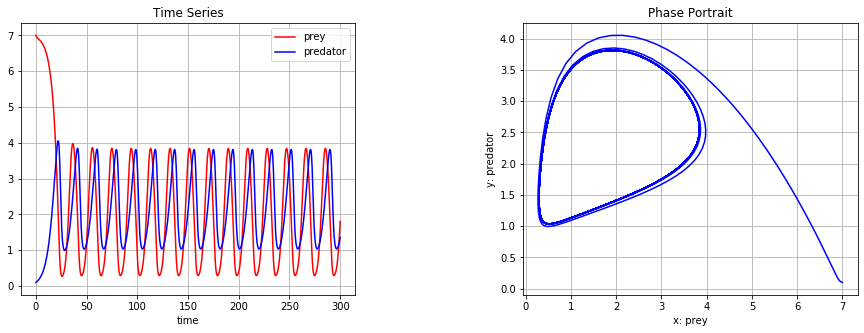

In [1]:
# Time series and phase portrait for a predator-prey system.

#Import necessary packages:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# The Holling-Tanner model differential equations:

def holling_tanner(X, t=0):
    ### here X[0] = x and X[1] = y
    return np.array([X[0] * (1 - X[0]/7) - 6 * X[0] * X[1] / (7 + 7*X[0]),
                    0.2 * X[1] * (1 - 0.5 * X[1] / X[0])])

##Defines time range of simulation
t = np.linspace(0, 300, 1000)

# Initial Condition: x0 = 7, y0 = 0.1
Sys0 = np.array([7, 0.1])

#the numerical integration in one line
X, infodict = integrate.odeint(holling_tanner, Sys0, t, full_output=True)
x, y = X.T #store values


##Plotting
fig = plt.figure(figsize=(15, 5)) #sets figure size
fig.subplots_adjust(wspace=0.5, hspace=0.3)
ax1 = fig.add_subplot(1, 2, 1) #creates two axes figures next to each other
ax2 = fig.add_subplot(1, 2, 2)


##First figure -> Time Series
ax1.plot(t,x, 'r-', label='prey') #plot the prey pop. as a function of time
ax1.plot(t,y, 'b-', label='predator') #plot the predator pop. as a function of time 
#first figure aesthetics
ax1.set_title('Time Series')
ax2.set_ylabel('populations')
ax1.set_xlabel('time')
ax1.grid()
ax1.legend(loc='best')

##Second figure -> Phase space
ax2.plot(x, y, color='blue') #plot x values vs y values (omit time)
#second figure aesthetics
ax2.set_xlabel('x: prey')
ax2.set_ylabel('y: predator')
ax2.set_title('Phase Portrait')
ax2.grid()

###Show both figures
plt.show()

## Dynamics of the System

In the model system, the predators thrive when there are plentiful prey but, ultimately, outstrip their food supply and decline. As the predator population is low, the prey population will increase again. *These dynamics will continue in a cycle of growth and decline.*

We plot solutions parametrically as orbits in phase space, without representing time, but with one axis representing the number of prey and the other axis representing the number of predators for *all* time.

This curious behaviour in our phase space where we observe an isolated periodic trajectory is a *stable limit cycle*. All trajectories in the first quadrant are *drawn* towards this periodic cycle, and once there, remain forever. This model seems to match well with what happens for many predator-prey species in the natural world such as white-tailed deer and wolf in Ontario. We will cover periodicity of limit cycles in more detail in future lessons.



Adding more initial conditions:

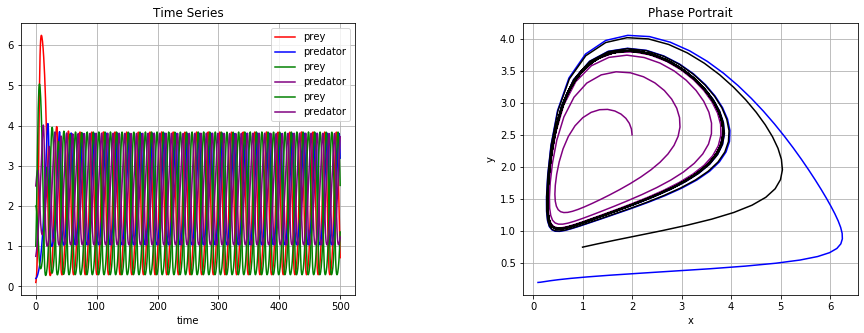

In [0]:
# Program 04a: Holling-Tanner model. See Figures 4.5 and 4.6.
# Time series and phase portrait for a predator-prey system.
import numpy as np
from scipy import integrate


import matplotlib.pyplot as plt
# The Holling-Tanner model.


def Holling_Tanner(X, t=0):
# here X[0] = x and X[1] = y
    return np.array( [ X[0] * (1 - X[0]/7) - 6 * X[0] * X[1]/(7 + 7*X[0]) ,
                      0.2 * X[1] * (1 - 0.5 * X[1] / X[0]) ] )    

t = np.linspace(0,500,1000)

##Initial conditions##

Sys0 = np.array([0.1,0.2])
Sys1 = np.array([2.0,2.5])
Sys2 = np.array([1.0,0.75])

#####Integral Curves#####

X, infodict = integrate.odeint(Holling_Tanner,Sys0,t, full_output = True)
Y, infodict = integrate.odeint(Holling_Tanner,Sys1,t, full_output = True)
Z, infodict = integrate.odeint(Holling_Tanner,Sys2,t, full_output = True)

x,y = X.T
x1,y1 = Y.T
x2,y2 = Z.T

#Plotting
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2) 

#First Plot: Time Series
ax1.plot(t,x,'r-', label = 'prey')
ax1.plot(t,y,'b', label = 'predator')

ax1.plot(t,x1,color = "green", label = 'prey')
ax1.plot(t,y1,color = "purple", label = 'predator')

ax1.plot(t,x2,color = "green", label = 'prey')
ax1.plot(t,y2,color = "purple", label = 'predator')


ax1.set_title('Time Series')
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc = 'best')


#Second Plot: Phase Portrait
ax2.plot(x,y, color = "blue")

ax2.plot(x1,y1, color = "purple")

ax2.plot(x2,y2, color = 'black')

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("Phase Portrait")
ax2.grid()


plt.show()

